<h1>Homework (30% of overall grade)</h1>


<h2>Introduction to programming and data visualisation</h2>

Dataset 1 (the dataset was uploaded on Blackboard: 'dataProblem1.csv')

Your company was asked to devise a machine learning model that can classify fruit based on quantitative features, such as weight and size. Your managed asked you to build a preliminary model that can classify apple vs. non-apple on a small example dataset. The dataset has about 400 entries including apples, oranges, and lemons. The columns of the dataset indicate the class of the entry (apple, orange, or lemon), the weight, width, length, and a colour-score which is an unspecified value indicating the colour of the fruit.
- Task 1 (25 points out of 100): Study the dataset. Visualise the data (e.g., using scatterplots). Try different combinations of features on the x-axis and y-axis. Different colours or markers should be used for different classes (e.g., apple vs. non-apple). The purpose of this task is to understand the dataset (e.g., is everything as expected?) and to discuss this with your manager. To do so, produce the plots and explain the meaning of the figures in plain English.
- Task 2 (30 points out of 100): Fit a binary classifier and quantify its accuracy. Visualise the classification results as we discussed in the lectures and tutorials. In addition, add a short description in plain English (e.g., by using the Python comments) to each numerical result, explaining what that value represents and what can be concluded from the analysis.
- Task 3 (10 points out of 100): Fit a 3-class classifier for apples vs. oranges vs. lemons and quantify the classification accuracy. As in task 2, please discuss the result in plain English.

Dataset 2 (link: https://osf.io/n752f/ or, on Blackboard, dataProblem2.xlsx)

Similar to the previous tasks, your company is asked to determine how accurately it is possible to identify dyslexic individuals based on a small publicly available dataset. 

- Task 4 (15 points out of 100): Study the dataset. Note that you are free to search for the documentation of that data and even the related paper. Visualise the data. What appear to be the most promising features?
- Task 5 (20 points out of 100): Fit a binary classifier and quantify its accuracy. Visualise the classification results as we discussed in the lectures and tutorials. In addition, add a short description in plain English (e.g., by using the Python comments) to each numerical result, explaining what that value represents and what can be concluded from the analysis. Use the model to determine the most important features, which could be used as diagnostic markers.


Note: Remember that there may be many answers! You will be evaluated based on both your code and your understanding of the problem. Be curious! What would you tell to your manager? Can the dataset be improved? How?

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score, make_scorer

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree



<h4>Task 1</h4>

In [2]:
# TODO

"""
Import Dataset

This code block is used to import the data set from CSV file
"""
df_fruit = pd.read_csv("dataProblem1.csv")
df_fruit.head() # check


,fruit_label,fruit_name,weight,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,1,apple,178,7.1,7.8,0.92
4,1,apple,172,7.4,7.0,0.89


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fruit_label  399 non-null    bool 
 1   fruit_name   399 non-null    bool 
 2   weight       399 non-null    bool 
 3   width        399 non-null    bool 
 4   height       399 non-null    bool 
 5   color_score  399 non-null    bool 
dtypes: bool(6)
memory usage: 2.5 KB
None


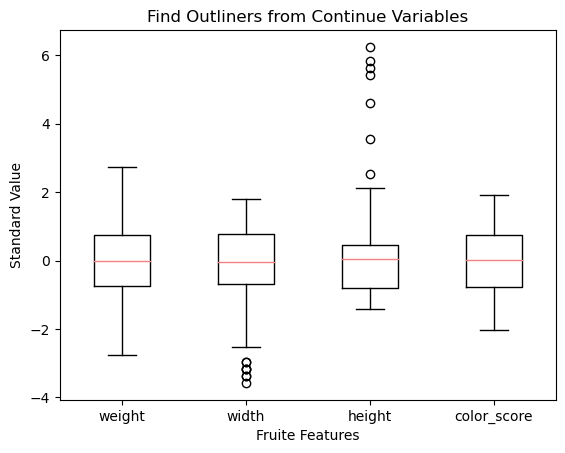

'\nWe can conclude:\n\n[0] This data set has no null value.\n\n[1] For categorical variables, fruit_label and fruit_name is the same variables in different form.\n\n[2] For continue variables, weight and color_score have no outliers, but width and height have.\n    In real working situation, we should ask our colleges to check if the outliers are sudo or real.\n\n* In this case, I assumpt the outliers are pesuedo outliers, so I just keep them and continue my analyst.\n'

In [3]:
"""
Data Tidy - Null & Outliers

This code block is used to find out null value and outliers.
"""
# check if there are missing value
print(df_fruit.isnull().info()) # the results is non-null

####### for categorical variable, use value counts to see the details #######

# because fruit_label and fruit_name is the same variable, so I only did the fruit_name value counts.
target_name_0 = ["fruit_name"] # store the categorical variable name

####### for continue variable, use box plot to see if there are outlier #######

# because the middle value of different variables has a huge gap,
# so I standard the value to make the plot more visualable.
feature_name_0 = ["weight", "width", "height", "color_score"] # store the continue variable names
feature_scaler_value = StandardScaler().fit_transform(df_fruit[feature_name_0]) # standardlized the variables
# draw the box plot
plt.figure()
plt.boxplot(feature_scaler_value, labels=feature_name_0, 
            medianprops=dict(color="#F38181")) # set aesthetic
plt.xlabel("Fruite Features") 
plt.ylabel("Standard Value")
plt.title("Find Outliners from Continue Variables")
plt.show("\n")

"""
We can conclude:

[0] This data set has no null value.

[1] For categorical variables, fruit_label and fruit_name is the same variables in different form.

[2] For continue variables, weight and color_score have no outliers, but width and height have.
    In real working situation, we should ask our colleges to check if the outliers are sudo or real.

* In this case, I assumpt the outliers are pesuedo outliers, so I just keep them and continue my analyst.
"""


 fruit_name
apple         199
lemon         100
orange        100
dtype: int64


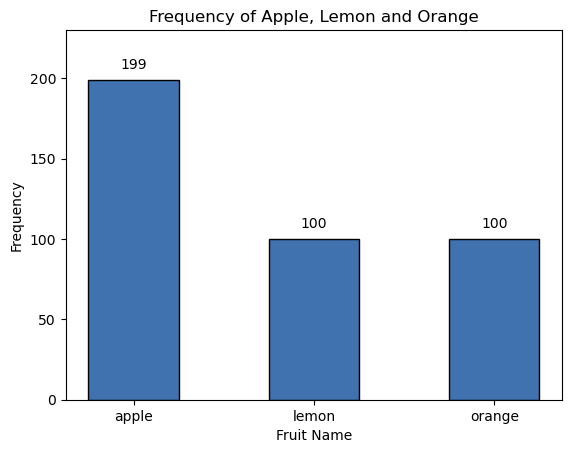

'\nWe can conclude:\n\n[0] For categorical variable, the distribution of frequency is:\n    Apple 199, Orange 100, Lemon 100.\n\n[1] When we regard fruit_name as target variable, we got this:\n    · Binary case: Apple 50%, Non-apple 50%\n    · three-class case: Apple 50%, Lemon 25%, Orange 25%\n'

In [4]:
"""
Single Data Description - Categorical Variable Visualisation

This code block is used to visualisation the distribution of categorical variables.
I choose bar plot to describe the feature, because it is the relationship between category and continue variables.
Categorical variables including: fruit_name
"""

####### Categorical variables - Frequency #######

# extract the index and values from cate_sum_value
target_sum_value = df_fruit[target_name_0].value_counts() # count the frequency of each level in categorical variable
print("\n", target_sum_value)
fruit_names = [i[0] for i in target_sum_value.index] # get the index, aka fruit names
fruit_freq = target_sum_value.values # get the frequency values for each fruit

####### draw bar plot #######
plt.figure()
plt.bar(fruit_names, fruit_freq, 
        color="#3F72AF", edgecolor="black", width=0.5) # set aesthetic to make beautiful :)
for i, freq in enumerate(fruit_freq): 
    plt.text(i, freq + 5, freq, ha='center', va='bottom') # add label
plt.ylim(0, 230) # adjust the y scale to show the text label
plt.xlabel("Fruit Name") 
plt.ylabel("Frequency") 
plt.title("Frequency of Apple, Lemon and Orange") 
plt.show()

"""
We can conclude:

[0] For categorical variable, the distribution of frequency is:
    Apple 199, Orange 100, Lemon 100.

[1] When we regard fruit_name as target variable, we got this:
    · Binary case: Apple 50%, Non-apple 50%
    · three-class case: Apple 50%, Lemon 25%, Orange 25%
"""

Continue variable means:
 [166.47, 7.53, 7.48, 0.67] 

Continue variable stds:
 [18.23, 0.48, 0.48, 0.14]


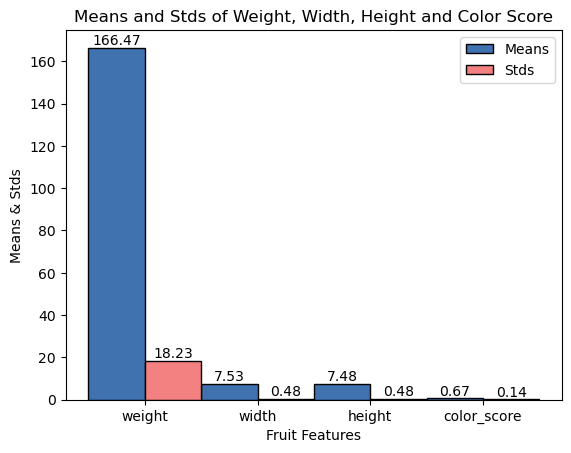

'\nWe can conclude:\n\n[0] For continue variables, the distribution of means and stds are:\n    Weight mean: 166.47, Weight std: 18.23\n    Width mean: 7.53, Width std: 0.48\n    Height mean: 7.48, Height std: 0.48\n    Color score mean: 0.67, Color score std: 0.14\n\n[1] From the central tendency of the data distribution, the means are:\n    weight > wdith > height > color score\n\n[2] From the discrete trend of the data distribution, the stds are:\n    Most Dispersed Variable - weight > wdith = height > color score - Most Concentrated Variable\n'

In [5]:
"""
Single Data Description - Continue Variable Visualisation

This code block is used to visualisation the distribution of continue variables.
I choose bar plot to describe the feature, because it is the relationship between category and continue variables.
Continue variables including: weight, width, height and color_score.
"""

####### Continue variables - Mean & Std. #######

# calculate the stds and means of continue variables
feature_means = df_fruit[feature_name_0].mean()
feature_means = [round(i, 2) for i in feature_means] # round to 2 decimal places
feature_stds = df_fruit[feature_name_0].std()
feature_stds = [round(i, 2) for i in feature_stds] # round to 2 decimal places
print("Continue variable means:\n", feature_means, "\n"
      "\nContinue variable stds:\n", feature_stds)

# draw bar plot
plt.figure()
x = np.arange(len(feature_means)) # set x axis length
bar_width = 0.5
plt.bar(x - bar_width/2, height=feature_means, width=0.5, # draw mean bars
        color="#3F72AF", edgecolor="black") # mean bars aes
plt.bar(x + bar_width/2, height=feature_stds, width=0.5, # draw std bars
        color="#F38181", edgecolor="black") # std bars aes
plt.xticks(x, ["weight", "width", "height", "color_score"]) # set x axis names
for i, conti_mean, conti_std in zip(x, feature_means, feature_stds): # add text on the top of bars
    plt.text(i-bar_width/2, conti_mean, str(conti_mean), ha="center", va="bottom", fontsize=10)
    plt.text(i+bar_width/2, conti_std, str(conti_std), ha="center", va="bottom", fontsize=10)
plt.legend(labels=["Means", "Stds"], loc="upper right") # show the legend
plt.xlabel("Fruit Features")
plt.ylabel('Means & Stds')
plt.title("Means and Stds of Weight, Width, Height and Color Score")
plt.show()

"""
We can conclude:

[0] For continue variables, the distribution of means and stds are:
    Weight mean: 166.47, Weight std: 18.23
    Width mean: 7.53, Width std: 0.48
    Height mean: 7.48, Height std: 0.48
    Color score mean: 0.67, Color score std: 0.14

[1] From the central tendency of the data distribution, the means are:
    weight > wdith > height > color score

[2] From the discrete trend of the data distribution, the stds are:
    Most Dispersed Variable - weight > wdith = height > color score - Most Concentrated Variable
"""

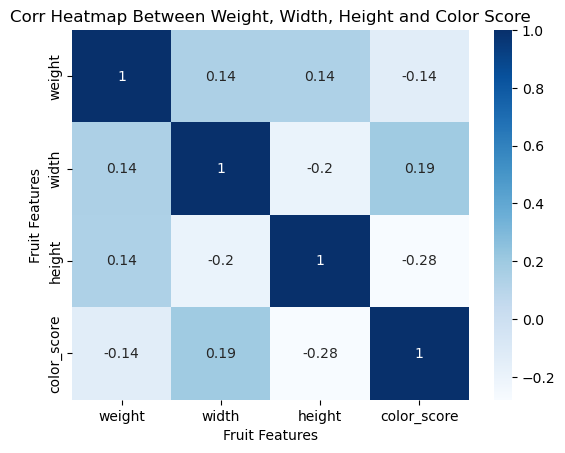

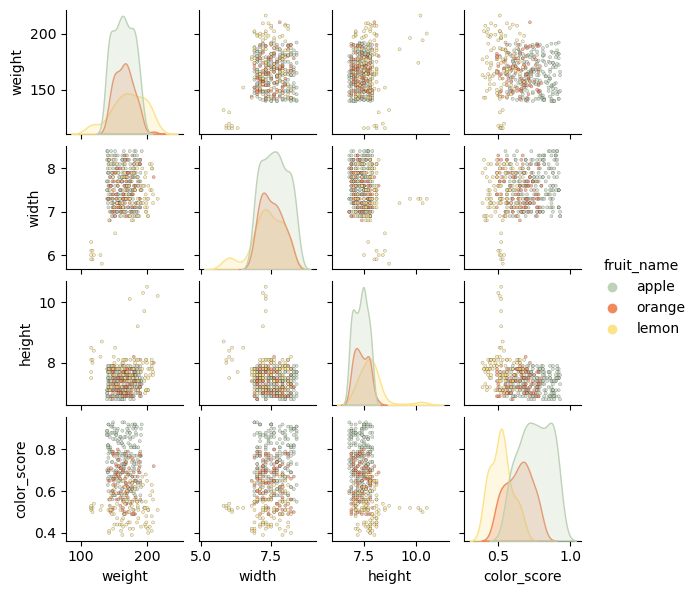

'\nWe can conclude:\n\n[0] For the heatmap, \n    · Height and color_score have the strongest negative correlation -0.28,\n      which means when one of these two features increase, the other one will decrease,\n      but it is not very significant.\n    · Width and colot_socre have the strongest positive correlation 0.19,\n      which means when one of these two features increase, the other one will increase,\n      but it is also not very significant.\n\n[1] For the scatter martrix, we get these information:\n    · There is no linear relationship betweeen all these features.\n    · It is hard to find a clear cluster different trough scatter.\n'

In [6]:
"""
Multiple Data Description - Weight, Width, Height and Color Score

This code block is used to visualisation relationship between weight, width, height and color score.
I choose heatmap and scatter matrix to describe the feature.
Because it is the relationship between several continue variables, and it is also a coefficient martrix.
"""

####### draw heatmap #######

# calculate the correlation matrix
corr = df_fruit.iloc[:, 2:6].corr() # extract the column
# draw heatmap
sns.heatmap(corr, annot=True, cmap="Blues")
plt.xlabel("Fruit Features")
plt.ylabel("Fruit Features")
plt.title("Corr Heatmap Between Weight, Width, Height and Color Score")
plt.show()

####### draw scatter matrix #######

sns.pairplot(df_fruit.iloc[:, 1:6], height=1.5, hue="fruit_name",
             palette = ["#BDD2B6", "#F08A5D", "#FCE38A"], # Easter eggs! use fruit normal color as aesthetic
             plot_kws = {"alpha": 0.6, "s": 5,  "edgecolor": "black"}) # adjust the size and shape of points
plt.show()

"""
We can conclude:

[0] For the heatmap, 
    · Height and color_score have the strongest negative correlation -0.28,
      which means when one of these two features increase, the other one will decrease,
      but it is not very significant.
    · Width and colot_socre have the strongest positive correlation 0.19,
      which means when one of these two features increase, the other one will increase,
      but it is also not very significant.

[1] For the scatter martrix, we get these information:
    · There is no linear relationship betweeen all these features.
    · It is hard to find a clear cluster different trough scatter.
"""

<h4>Task 2</h4>

In [7]:
# TODO
"""
Data Prepartion - Create a Binary Variable

This code block is used to create a binary variable by recoding the levels fruit_name.
I will recode the fruit_name into these shape: 
1 -> apple, 0 -> non-apple (orange & lemon)
"""

# use replace method to recode the fruit_name
df_fruit["binfruit_name"] = df_fruit["fruit_name"].replace({"apple": 1, "lemon": 0, "orange": 0})
df_fruit # check, and we can see the results shows 1 as apple, 0 as non-apple. Bingo!

,fruit_label,fruit_name,weight,width,height,color_score,binfruit_name
0,1,apple,192,8.4,7.3,0.55,1
1,1,apple,180,8.0,6.8,0.59,1
2,1,apple,176,7.4,7.2,0.60,1
3,1,apple,178,7.1,7.8,0.92,1
4,1,apple,172,7.4,7.0,0.89,1
...,...,...,...,...,...,...,...
394,3,lemon,166,7.8,7.9,0.49,0
395,3,lemon,167,7.9,7.5,0.62,0
396,3,lemon,198,7.4,8.1,0.43,0
397,3,lemon,207,7.5,8.0,0.48,0


In [8]:
"""
Data Prepartion - Features & Target Variable, Training Set & Testing set & Validity Set

This code block is used to create features as X and target variable as y.
And I will divid data into traning set (80%) and testing set (20%),
then I will divid 25% of traning set into validity set.
"""

# features = weight, width, height and color_score
X = df_fruit[feature_name_0]
# target variable = binfruit_name
y = df_fruit["binfruit_name"]
# splite X and y into traning and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# splite X_train and y_train into a validity set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [9]:
"""
Model Fit - Binary Classifier & Accuracy Quantify

This code block is used to choose a binary model and fit it.
Because it is binary in target variable, so I choose decision tree classifier.
Finally, I calculate the score of training set, validity set and testing set.
"""

# initial the model
clf_binary_fruit = DecisionTreeClassifier(max_depth=3, random_state=42)
# use X_train_0 and y_train data to train the model
clf_binary_fruit.fit(X_train, y_train)

####### predict the results #######
predicted_y_train = clf_binary_fruit.predict(X_train)
predicted_y_val = clf_binary_fruit.predict(X_val)
predicted_y_test = clf_binary_fruit.predict(X_test)

####### calculate score #######
train_score = clf_binary_fruit.score(X_train, y_train)
val_score = clf_binary_fruit.score(X_val, y_val)
test_score = clf_binary_fruit.score(X_test, y_test)
# print the score
print("Score: ", train_score, val_score, test_score)

####### calculate f1 score #######
train_f1 = f1_score(y_train, predicted_y_train, average='weighted')
val_f1 = f1_score(y_val, predicted_y_val, average='weighted')
test_f1 = f1_score(y_test, predicted_y_test, average='weighted')
# print the f1 score
print("F1 Score: ", train_f1, val_f1, test_f1)

"""
We can conclude:

[0] The scores of each set are:
    Training set 0.78, Validity set 0.75, Testing set 0.81.

[1] The baseline of a binary question is 0.5. 
    And our score 0.81 in testing set is a very nice results.
    
* I will explain how we calculate 0.81 scores in Confusion Matrix Display part.
"""

Score:  0.7782426778242678 0.75 0.8125
F1 Score:  0.7704142101910401 0.7423273657289002 0.8019480519480519


'\nWe can conclude:\n\n[0] The scores of each set are:\n    Training set 0.78, Validity set 0.75, Testing set 0.81.\n\n[1] The baseline of a binary question is 0.5. \n    And our score 0.81 in testing set is a very nice results.\n    \n* I will explain how we calculate 0.81 scores in Confusion Matrix Display part.\n'

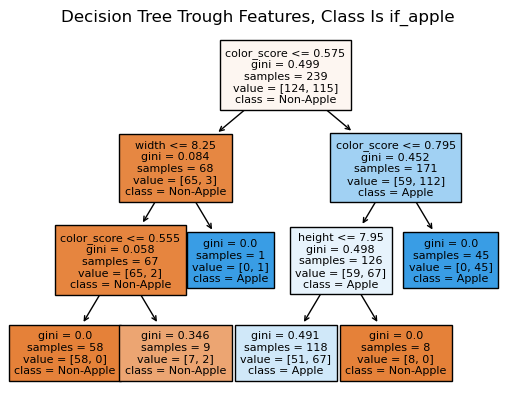

"\nWe can conclude:\n\n[0] In decision tree: these parameters' meaning are:\n    gini: measure the impurity within this class\n    value: refers the count of samples for each class \n           for example, value = [59, 112] means 59 in Non-Apple, 112 in Apple\n    class: the label\n\n[1] The darker the color, the purer the category. \n    In other words, the color is the visualization of the gini value.\n\n[2] This is a 3 depth decision tree, and AI used these indicators to seperate the sample:\n\n    · color_score as the first one (see the top of the tree \n        - if the color_score <= 0.575, the remain data can be explained in the same way)\n    · width and color_score (see the first structure)\n    · color_score and height (see the second structure)\n    · finally every single sample has a class.\n"

In [10]:
"""
Model Visualisation - Decision Tree

This code block is used to draw the decision tree.
"""
plt.figure()
plot_tree(clf_binary_fruit, 
          feature_names=X_train.columns,  # the feature is all X_train columns
          class_names=["Non-Apple", "Apple"],  # the label is apple and non-apple
          filled=True, # fill the color
          fontsize=8)  # set fontsize as 8
plt.title("Decision Tree Trough Features, Class Is if_apple")
plt.show()

"""
We can conclude:

[0] In decision tree: these parameters' meaning are:
    gini: measure the impurity within this class
    value: refers the count of samples for each class 
           for example, value = [59, 112] means 59 in Non-Apple, 112 in Apple
    class: the label

[1] The darker the color, the purer the category. 
    In other words, the color is the visualization of the gini value.

[2] This is a 3 depth decision tree, and AI used these indicators to seperate the sample:

    · color_score as the first one (see the top of the tree 
        - if the color_score <= 0.575, the remain data can be explained in the same way)
    · width and color_score (see the first structure)
    · color_score and height (see the second structure)
    · finally every single sample has a class.
"""

'\nWe can conclude:\n\n[0] This martix shows the information:\n    True negatives are 20, True positives are 45 \n    False positives are 14, False negatives is 1\n\n[1] The test set score calculate: \n    TN + TP / TN + TP + FP + FN = \n    20 + 45 / 20 + 14 + 1 + 45 = 0.8125\n'

<Figure size 640x480 with 0 Axes>

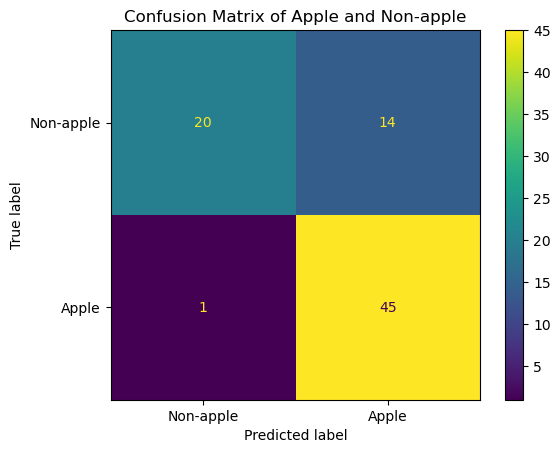

In [11]:
"""
Model Visualisation - Confusion Matrix

This code block is used to draw the confusion matrix.
"""

plt.figure()
ConfusionMatrixDisplay.from_estimator(clf_binary_fruit, X_test, y_test,
                                      display_labels=["Non-apple", "Apple"]) # set the label
plt.title("Confusion Matrix of Apple and Non-apple")

"""
We can conclude:

[0] This martix shows the information:
    True negatives are 20, True positives are 45 
    False positives are 14, False negatives is 1

[1] The test set score calculate: 
    TN + TP / TN + TP + FP + FN = 
    20 + 45 / 20 + 14 + 1 + 45 = 0.8125
"""

<h4>Task 3</h4>

In [12]:
# TODO

"""
Data Prepartion - Features & Target Variable, Training Set & Testing set & Validity Set

This code block is used to create features as X and target variable as y.
And I will divid data into traning set (80%) and testing set (20%),
then I will divid 25% of traning set into validity set.
"""

# features = weight, width, height and color_score
X = df_fruit[feature_name_0]
# target variable = fruit_name
y = df_fruit["fruit_name"] # fruit_name is a 3 class target variable
# splite X and y into traning and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# splite X_train and y_train into a validity set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
"""
Model Fit - Binary Classifier & Accuracy Quantify

This code block is used to choose a binary model and fit it.
Because it is three-class in target variable, so I choose random forest classifier.
Finally, I calculate the score of training set, validity set and testing set.
"""

####### classifier #######
clf_3class_fruit = RandomForestClassifier(max_depth=4, random_state=42)
clf_3class_fruit.fit(X_train, y_train)

####### predict the results #######
predicted_y_train = clf_3class_fruit.predict(X_train)
predicted_y_val = clf_3class_fruit.predict(X_val)
predicted_y_test = clf_3class_fruit.predict(X_test)

####### calculate accuracy #######
train_score = clf_3class_fruit.score(X_train, y_train)
val_score = clf_3class_fruit.score(X_val, y_val)
test_score = clf_3class_fruit.score(X_test, y_test)
print("Score: ", train_score, val_score, test_score)

####### calculate f1 score #######
train_f1 = f1_score(y_train, predicted_y_train, average='weighted')
val_f1 = f1_score(y_val, predicted_y_val, average='weighted')
test_f1 = f1_score(y_test, predicted_y_test, average='weighted')
print("F1 Score: ", train_f1, val_f1, test_f1)

"""
We can conclude:

[0] The scores of each set are:
    Training set 0.75, Validity set 0.73, Testing set 0.74.

[1] The baseline of a binary question is 0.5 for apple, 0.25 for lemon and orange. 
    And our score 0.74 in testing set is a very nice results.

* I will explain how we calculate 0.74 scores in Confusion Matrix Display part.
"""

Score:  0.7450980392156863 0.734375 0.7375
F1 Score:  0.6802363329437735 0.6781600560897436 0.6789635854341737


'\nWe can conclude:\n\n[0] The scores of each set are:\n    Training set 0.75, Validity set 0.73, Testing set 0.74.\n\n[1] The baseline of a binary question is 0.5 for apple, 0.25 for lemon and orange. \n    And our score 0.74 in testing set is a very nice results.\n\n* I will explain how we calculate 0.74 scores in Confusion Matrix Display part.\n'

Index(['color_score', 'height', 'weight', 'width'], dtype='object')


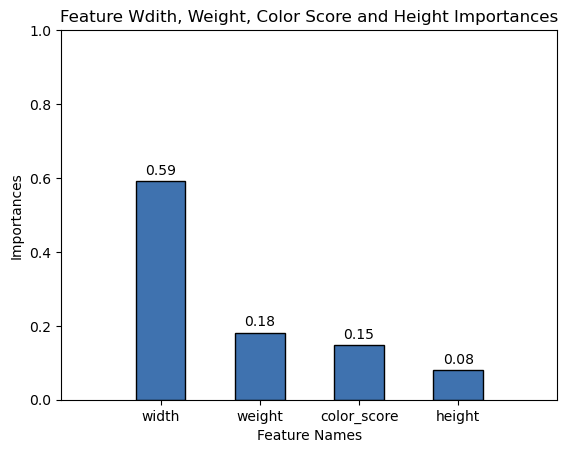

'\nWe can conclude:\n\n[0] The importances between features are:\n    Width (0.59) > Weight (0.18) > Color Score (0.15) > Height (0.08)\n    Which means width influence more for the predict results, while height less.\n'

In [14]:
"""
Model Visualisation - Feature Importances

This code block is used to draw the feature importances.
I draw a bar plot to visualise it.
"""

####### bar plot data prepare #######
importances = clf_3class_fruit.feature_importances_ # get every feature's importance
indices = np.argsort(importances)[::-1] # sort the importances, reverse
print(X.columns[indices]) # check the indices

####### draw the bar plot #######
plt.figure()
plt.bar(range(X.shape[1]), importances[indices], # data
        color="#3F72AF", align="center", edgecolor="black", width=0.5) # aes set
plt.xticks(range(X.shape[1]), ["width", "weight", "color_score", "height"])
plt.xlim([-1, X.shape[1]]) # set x axis length
plt.ylim(0, 1) # set y axis length
for i, freq in enumerate(importances[indices]): 
    plt.text(i, freq + 0.01, round(freq, 2), ha='center', va='bottom') # add text label
plt.xlabel("Feature Names")
plt.ylabel("Importances")
plt.title("Feature Wdith, Weight, Color Score and Height Importances")
plt.show()

"""
We can conclude:

[0] The importances between features are:
    Width (0.59) > Weight (0.18) > Color Score (0.15) > Height (0.08)
    Which means width influence more for the predict results, while height less.
"""

['apple' 'orange' 'lemon']


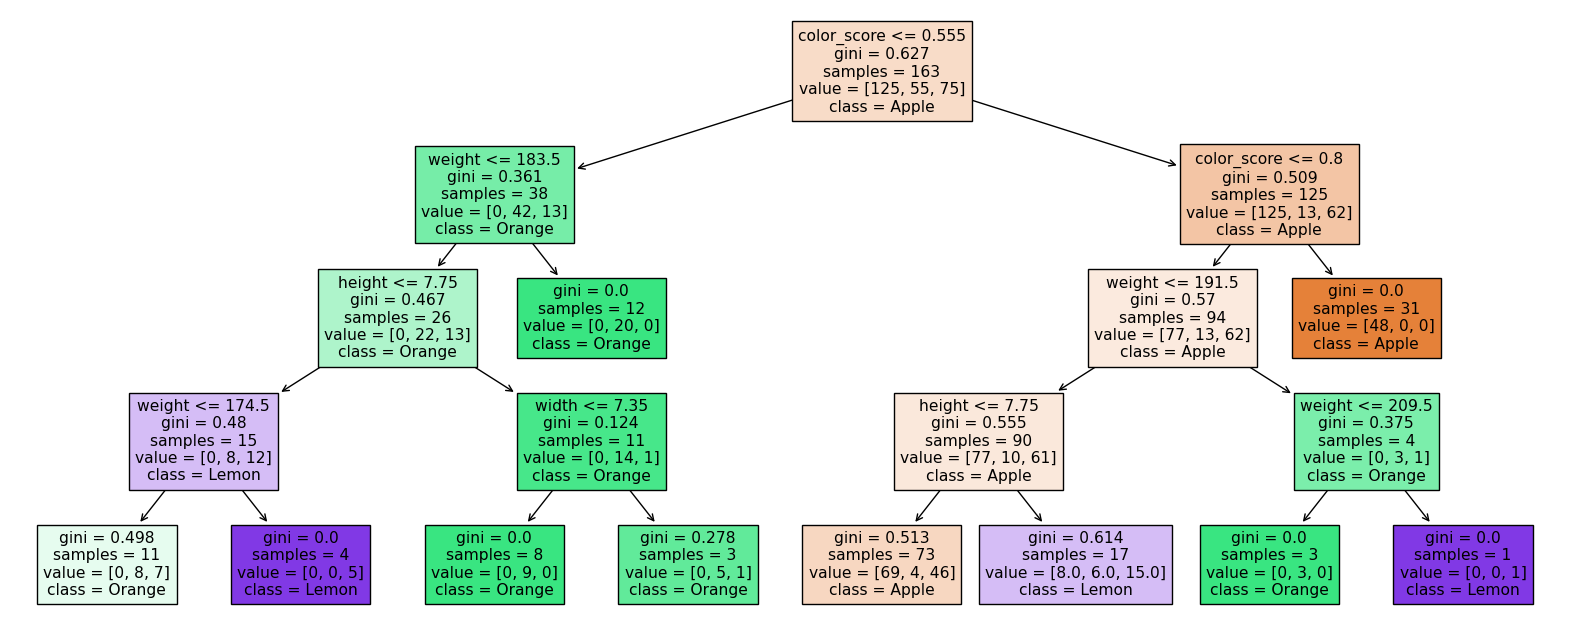

'\nWe can conclude:\n\n[0] This is a 4 depth decision tree, and AI used these indicators to seperate the sample:\n\n    · color_score as the first one (see the top of the tree \n        - if the color_score <= 0.555, the remain data can be explained in the same way)\n    · weight and color_score (see the first structure)\n    · height and weight (see the second structure)\n    · weight, width and height (see the forth structure)\n    · finally every single sample has a class.\n'

In [15]:
"""
Model Visualisation - Decision Tree

This code block is used to draw the random forest decision tree.
"""

print(y.unique()) # check the label name

plt.figure(figsize=(20, 8))
plot_tree(clf_3class_fruit.estimators_[0], 
          feature_names=X.columns, class_names=["Apple", "Orange", "Lemon"], # set data
          filled=True) # more visualable
plt.show()

"""
We can conclude:

[0] This is a 4 depth decision tree, and AI used these indicators to seperate the sample:

    · color_score as the first one (see the top of the tree 
        - if the color_score <= 0.555, the remain data can be explained in the same way)
    · weight and color_score (see the first structure)
    · height and weight (see the second structure)
    · weight, width and height (see the forth structure)
    · finally every single sample has a class.
"""


'\nWe can conclude:\n\n[0] This martix shows the information:\n    True positives are 44 + 14 +1 = 59, \n    False positives are 4 + 11 + 2 + 3 + 0 + 1 = 21\n\n[1] The test set score calculate: \n    TP / TP + FP = 59 / 59 + 21 = 0.7375\n\n[2] We can find this model is very well at Apple recognization (44 / 46),\n    not bad in orange recognization (14 / 19),\n    but very bad in lemon recognization (1 / 15).\n'

<Figure size 640x480 with 0 Axes>

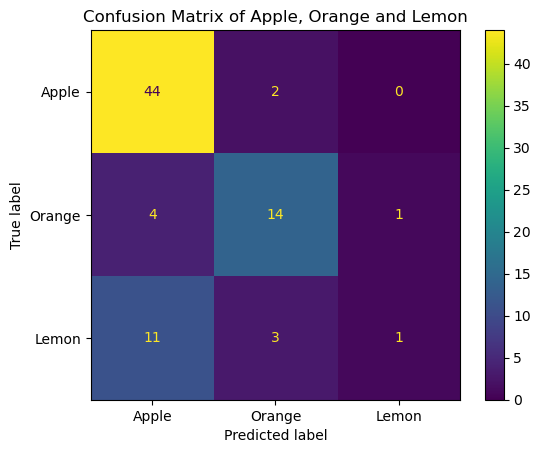

In [16]:
"""
Model Visualisation - Confusion Matrix

This code block is used to draw the confusion matrix.
"""

plt.figure()
ConfusionMatrixDisplay.from_estimator(clf_3class_fruit, X_test, y_test,
                                      display_labels=["Apple", "Orange", "Lemon"]) # set the label
plt.title("Confusion Matrix of Apple, Orange and Lemon")

"""
We can conclude:

[0] This martix shows the information:
    True positives are 44 + 14 +1 = 59, 
    False positives are 4 + 11 + 2 + 3 + 0 + 1 = 21

[1] The test set score calculate: 
    TP / TP + FP = 59 / 59 + 21 = 0.7375

[2] We can find this model is very well at Apple recognization (44 / 46),
    not bad in orange recognization (14 / 19),
    but very bad in lemon recognization (1 / 15).
"""

<h4>Task 4</h4>

In [17]:
# TODO

"""
Import Dataset

This code block is used to import the data set from Excel file
"""

df_dyslexia = pd.read_excel("dataProblem2.xlsx")
df_dyslexia.head()

,Dyslexia,TTO,TRO,TNO,RTO,RRO,RNO,NTO,NRO,NNO,TTS,TRS,TNS,RTS,RRS,RNS,NTS,NRS,NNS
0,y,13,3,8,2,15,7,6,6,12,5,12,7,7,11,6,8,12,4
1,y,16,4,4,1,12,11,0,14,10,15,7,2,2,14,8,1,8,15
2,y,15,4,5,3,8,13,4,1,19,12,2,10,7,9,8,0,4,20
3,y,12,6,6,2,11,11,0,6,18,14,5,5,1,12,11,1,7,16
4,y,17,4,3,4,9,11,3,5,16,18,2,4,2,15,7,2,9,13


In [18]:
"""
Literature Review - Codebook & Feature Select

Michał showed the codebook of this data set in his passage (Obidziński, 2021):

* TTO	    Number of answers "the same" on target in orthographical condition
% TRO	    Number of answers "related" on target in orthographical condition
TNO	    Number of answers "new" on target in orthographical condition
RTO	    Number of answers "the same" on related stimuli in orthographical condition
*% RRO 	    Number of answers "related" on related stimuli in orthographical condition
RNO 	Number of answers "new" on related stimuli in orthographical condition
% NTO	    Number of answers "the same" on new stimuli in orthographical condition
NRO 	Number of answers "related" on new stimuli in orthographical condition
* NNO	    Number of answers "new" on new stimuli in orthographical condition
* TTS	    Number of answers "the same" on target in semantical condition
TRS	    Number of answers "related" on target in semantical condition
TNS	    Number of answers "new" on target in semantical condition
RTS 	Number of answers "the same" on related stimuli in semantical condition
* RRS	    Number of answers "related" on related stimuli in semantical condition
% RNS	    Number of answers "new" on related stimuli in semantical condition
NTS 	Number of answers "the same" on new stimuli in semantical condition
NRS	    Number of answers "related" on new stimuli in semantical condition
* NNS	    Number of answers "new" on new stimuli in semantical condition

* The right answer amount. (TTO, RRO, NNO, TTS, RRS, NNS)
% The chosen features as predictors in passage. (TRO, RRO, NTO, RNS)

And in his antoher paper, he divided the students into two groups and start experiments (Obidziński, 2017).
So, my approach will follow these two suggestions:

1. choose TRO, RRO, NTO, RNS as my key features, but finally I drop NTO (See Data Visualisation block),
2. focus more on a groupby method for Dyslexia target variable.

Reference:

Obidziński, M., 2021. Response frequencies in the conjoint recognition memory task as predictors of developmental
    dyslexia diagnosis: A decision-trees approach. Dyslexia, 27(1), pp.50-61.
    
Obidziński, M. and Nieznański, M., 2017. False memory for orthographically versus semantically similar words in 
    adolescents with dyslexia: a fuzzy-trace theory perspective. Annals of dyslexia, 67(3), pp.318-332.
"""

'\nLiterature Review - Codebook & Feature Select\n\nMichał showed the codebook of this data set in his passage (Obidziński, 2021):\n\n* TTO\t    Number of answers "the same" on target in orthographical condition\n% TRO\t    Number of answers "related" on target in orthographical condition\nTNO\t    Number of answers "new" on target in orthographical condition\nRTO\t    Number of answers "the same" on related stimuli in orthographical condition\n*% RRO \t    Number of answers "related" on related stimuli in orthographical condition\nRNO \tNumber of answers "new" on related stimuli in orthographical condition\n% NTO\t    Number of answers "the same" on new stimuli in orthographical condition\nNRO \tNumber of answers "related" on new stimuli in orthographical condition\n* NNO\t    Number of answers "new" on new stimuli in orthographical condition\n* TTS\t    Number of answers "the same" on target in semantical condition\nTRS\t    Number of answers "related" on target in semantical conditi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dyslexia  71 non-null     bool 
 1   TTO       71 non-null     bool 
 2   TRO       71 non-null     bool 
 3   TNO       71 non-null     bool 
 4   RTO       71 non-null     bool 
 5   RRO       71 non-null     bool 
 6   RNO       71 non-null     bool 
 7   NTO       71 non-null     bool 
 8   NRO       71 non-null     bool 
 9   NNO       71 non-null     bool 
 10  TTS       71 non-null     bool 
 11  TRS       71 non-null     bool 
 12  TNS       71 non-null     bool 
 13  RTS       71 non-null     bool 
 14  RRS       71 non-null     bool 
 15  RNS       71 non-null     bool 
 16  NTS       71 non-null     bool 
 17  NRS       71 non-null     bool 
 18  NNS       71 non-null     bool 
dtypes: bool(19)
memory usage: 1.4 KB
None


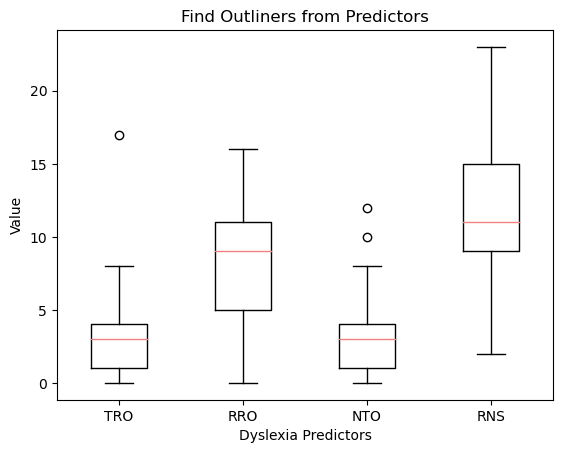

'\nWe can conclude:\n\n[0] This data set has no null value.\n\n[1] BRO and RNS have no outliers, but TRO and NTO have.\n    In real working situation, we should ask our colleges to check if the outliers are sudo or real.\n\n* In this case, I assumpt the outliers are pseudo outliers, so I just keep them and continue my analyst.\n'

In [19]:
"""
Data Tidy - Null & Outliers

This code block is used to find out null value and outliers.
"""

####### missing value #######
print(df_dyslexia.isnull().info()) # the results is non-null

feature_name_1 = ["TRO", "RRO", "NTO", "RNS"]
# draw the box plot
plt.figure()
plt.boxplot(df_dyslexia[feature_name_1], labels=feature_name_1, 
            medianprops=dict(color="#F38181")) # set aesthetic
plt.xlabel("Dyslexia Predictors") 
plt.ylabel("Value")
plt.title("Find Outliners from Predictors")
plt.show("\n")

"""
We can conclude:

[0] This data set has no null value.

[1] BRO and RNS have no outliers, but TRO and NTO have.
    In real working situation, we should ask our colleges to check if the outliers are sudo or real.

* In this case, I assumpt the outliers are pseudo outliers, so I just keep them and continue my analyst.
"""

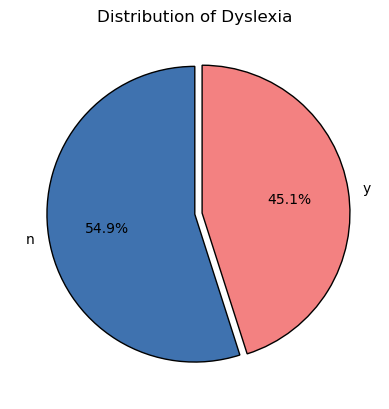

'\nWe can conclude:\n\nIn this data set:\n\n[0] Nearly 55% people are non-dyslexia, and nearly 45% people are dyslexia.\n\n[1] So our base line of dyslexia - yes is 0.45.\n'

In [20]:
"""
Data Visualisation - Dyslexia Description

This code block is used to describe the dyslexia distribution in our data set.
Because dyslexia is a binary target variable, so I choose pie plot to visualise it.
"""
####### got the data #######
dy_counts = df_dyslexia["Dyslexia"].value_counts()

####### pie plot to describe dyslexia #######
plt.figure()
plt.pie(dy_counts, labels=dy_counts.index, autopct='%1.1f%%', 
        explode=[0, 0.05],
        startangle=90,
        colors=["#3F72AF", "#F38181"], 
        wedgeprops=dict(edgecolor="black", linewidth=1))
plt.title("Distribution of Dyslexia")
plt.show()

"""
We can conclude:

In this data set:

[0] Nearly 55% people are non-dyslexia, and nearly 45% people are dyslexia.

[1] So our base line of dyslexia - yes is 0.45.
"""

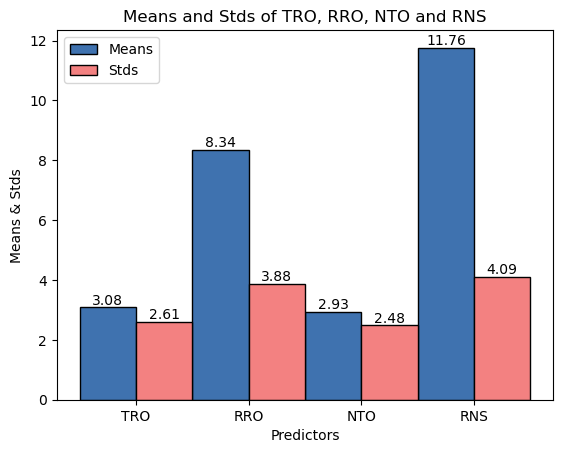

'\nWe can conclude:\n\n[0] For mean value, the order is:\n    RNS (11.76) > RRO (8.34) > TRO (3.08) > NTO (2.93)\n\n[1] For the discrete trend of the data distribution, the stds are:\n    Most Dispersed Variable - RNS > RRO > TRO > NTO - Most Concentrated Variable\n'

In [21]:
"""
Data Visualisation - TRO, RRO, NTO, RNS Description

This code block is used to visualisation the distribution of predictors.
I choose bar plot to describe the features, because it is the relationship between category and continue variables.
Continue variables including: weight, width, height and color_score.
"""
####### prepare the data #######
mean_values = df_dyslexia[feature_name_1].mean()
std_values = df_dyslexia[feature_name_1].std()

####### draw a bar plot #######
plt.figure()
x = np.arange(4) # set x axis length
bar_width = 0.5
plt.bar(x - bar_width/2, height=mean_values, width=0.5, # draw mean bars
        color="#3F72AF", edgecolor="black") # mean bars aes
plt.bar(x + bar_width/2, height=std_values, width=0.5, # draw std bars
        color="#F38181", edgecolor="black") # std bars aes
plt.xticks(x, ["TRO", "RRO", "NTO", "RNS"]) # set x axis names
for i, mean_values, std_values in zip(x, mean_values, std_values): # add text on the top of bars
    plt.text(i-bar_width/2, mean_values, round(mean_values, 2), ha="center", va="bottom", fontsize=10)
    plt.text(i+bar_width/2, std_values, round(std_values, 2), ha="center", va="bottom", fontsize=10)
plt.legend(labels=["Means", "Stds"], loc="upper left") # show the legend
plt.xlabel("Predictors")
plt.ylabel('Means & Stds')
plt.title("Means and Stds of TRO, RRO, NTO and RNS")
plt.show()

"""
We can conclude:

[0] For mean value, the order is:
    RNS (11.76) > RRO (8.34) > TRO (3.08) > NTO (2.93)

[1] For the discrete trend of the data distribution, the stds are:
    Most Dispersed Variable - RNS > RRO > TRO > NTO - Most Concentrated Variable
"""

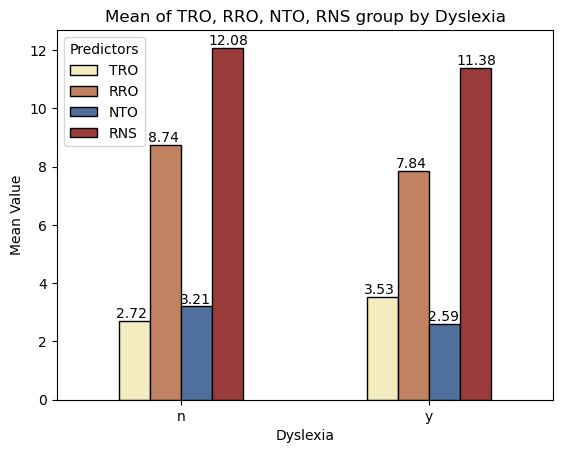

"\nWe can conclude:\n\n[0] The mean value differences between groups are:\n    delta_TRO = 2.72 - 3.53 = -0.81\n    delta_RRO = 8.74 - 7.84 = 0.9\n    delta_NTO = 3.21 - 2.59 = 0.62\n    delta_RNS = 12.08 - 11.38 = 0.7\n\n[1] So when we compare the differences with absolute value, we got:\n    |delta_RRO| > |delta_TRO| > |delta_RNS| > |delta_NTO|\n    So my conclusion is, maybe the importances order is:\n    RRO > TRO > RNS > NTO.\n\n[2] Because NTO doesn't show a significant differences between different group,\n    so I am considering to drop it off.\n\n    * But it is worth to notice that this is only a simple reference,\n      to confirm the real importances between these predictors,\n      we should fit the model (See task 5). \n"

In [22]:
"""
Data Visualisation - TRO, RRO, NTO, RNS Description, grounp by Dyslexia

This code block is used to see the mean value differences between Dyslexia.
There are 2 levels in Dyslexia, y for yes and n for no.
So I calculate the mean value through groupby command and visualised by bar plot.
"""

grouped_means = df_dyslexia.groupby("Dyslexia")[feature_name_1].mean()
grouped_means.plot(kind='bar', color=['#F2ECBE', '#C08261', '#4F709C', '#9A3B3B'], edgecolor='black')
plt.title("Mean of TRO, RRO, NTO, RNS group by Dyslexia")
plt.xlabel("Dyslexia")
plt.ylabel("Mean Value")
plt.xticks(rotation=0) 
plt.legend(title="Predictors", loc="upper left")
for i in range(len(grouped_means.index)):
    for j in range(len(grouped_means.columns)):
        plt.text(i + j * 0.13 - 0.2, grouped_means.iloc[i, j] + 0.1, f'{grouped_means.iloc[i, j]:.2f}', ha="center")
plt.show()

"""
We can conclude:

[0] The mean value differences between groups are:
    delta_TRO = 2.72 - 3.53 = -0.81
    delta_RRO = 8.74 - 7.84 = 0.9
    delta_NTO = 3.21 - 2.59 = 0.62
    delta_RNS = 12.08 - 11.38 = 0.7

[1] So when we compare the differences with absolute value, we got:
    |delta_RRO| > |delta_TRO| > |delta_RNS| > |delta_NTO|
    So my conclusion is, maybe the importances order is:
    RRO > TRO > RNS > NTO.

[2] Because NTO doesn't show a significant differences between different group,
    so I am considering to drop it off.

    * But it is worth to notice that this is only a simple reference,
      to confirm the real importances between these predictors,
      we should fit the model (See task 5). 
"""

/var/folders/g0/3n5mnqn17wlb0mtr7jqy_53c0000gn/T/ipykernel_30141/426852131.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_dyslexia[["Dyslexia", "TRO", "RRO", "NTO", "RNS"]].corr() # extract the column


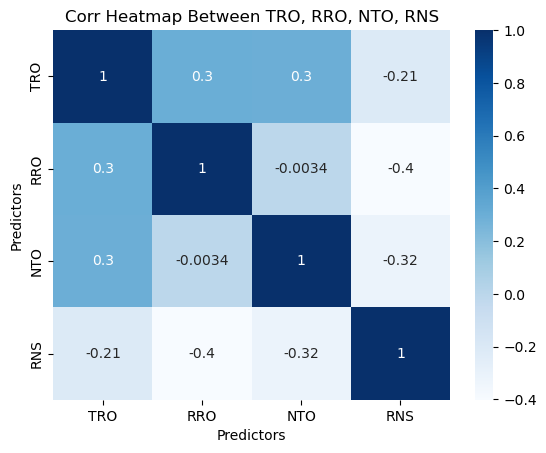

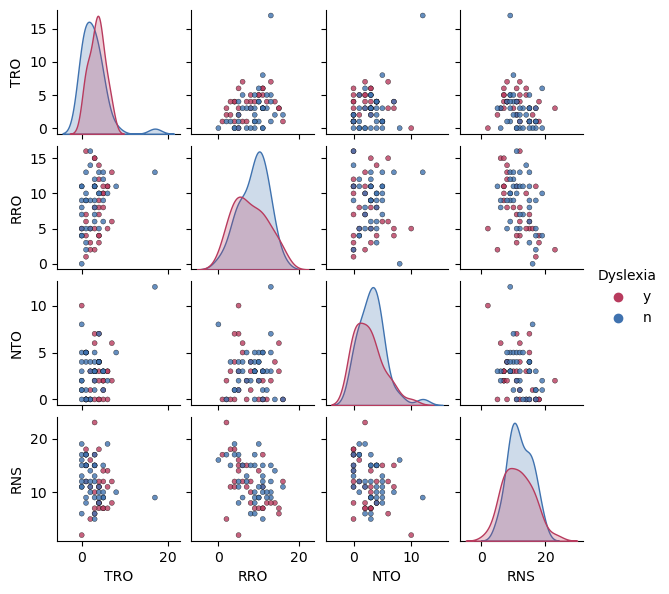

'\nWe can conclude:\n\n[0] For the heatmap, \n    · TRO and RRO, TRO and NTO have the strongest postive correlation 0.3,\n      which means when one of these two features increase, the other one will increase,\n      but it is not very significant.\n    · RRO and RNS have the strongest negative correlation -0.4,\n      which means when one of these two features increase, the other one will decrease,\n      but it is also not very significant.\n\n[1] For the scatter martrix, we get these information:\n    · There is no linear relationship betweeen all these features.\n    · It is hard to find a clear cluster different trough scatter.\n\n[2] Because RRO have a highest positive relationship to TRO positive, \n    and also a highest negative relationship to RNS,\n    so it can prove our hypothesis that RRO, RNS, TRO is key features.\n'

In [23]:
"""
Multiple Data Description - Weight, Width, Height and Color Score

This code block is used to visualisation relationship between TRO, RRO, NTO, RNS.
I choose heatmap and scatter matrix to describe the feature.
Because it is the relationship between several continue variables, and it is also a coefficient martrix.
"""

####### draw heatmap #######

# calculate the correlation matrix
corr = df_dyslexia[["Dyslexia", "TRO", "RRO", "NTO", "RNS"]].corr() # extract the column
# draw heatmap
sns.heatmap(corr, annot=True, cmap="Blues")
plt.xlabel("Predictors")
plt.ylabel("Predictors")
plt.title("Corr Heatmap Between TRO, RRO, NTO, RNS")
plt.show()

####### draw scatter matrix #######

sns.pairplot(df_dyslexia[["Dyslexia", "TRO", "RRO", "NTO", "RNS"]], height=1.5, hue="Dyslexia",
             palette = ["#B83B5E", "#3F72AF"], # Easter eggs! use fruit normal color as aesthetic
             plot_kws = {"alpha": 0.8, "s": 13,  "edgecolor": "black"}) # adjust the size and shape of points
plt.show()

"""
We can conclude:

[0] For the heatmap, 
    · TRO and RRO, TRO and NTO have the strongest postive correlation 0.3,
      which means when one of these two features increase, the other one will increase,
      but it is not very significant.
    · RRO and RNS have the strongest negative correlation -0.4,
      which means when one of these two features increase, the other one will decrease,
      but it is also not very significant.

[1] For the scatter martrix, we get these information:
    · There is no linear relationship betweeen all these features.
    · It is hard to find a clear cluster different trough scatter.

[2] Because RRO have a highest positive relationship to TRO positive, 
    and also a highest negative relationship to RNS,
    so it can prove our hypothesis that RRO, RNS, TRO are key features.

[3] We can't find a clear relationship between all these features through scatter matrix.
"""

<h4>Task 5</h4>

In [24]:
# TODO
"""
Data Prepartion - Features & Target Variable, Training Set & Testing set & Validity Set

This code block is used to create features as X and target variable as y.
And I will divid data into traning set (70%) and testing set (30%).
"""

# like we mentioned, because NTO is not very significant differences between group, so I drop it
# that can make our model more clear
predictors = ["TRO", "RRO", "RNS"]
# features = "TRO", "RRO","RNS"
X = df_dyslexia[predictors]
# X = df_dyslexia[feature_name_1]
# target variable = Dyslexia
y = df_dyslexia["Dyslexia"] # fruit_name is a 3 class target variable
# splite X and y into traning and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

"""
Because the sample size is too small, so I choose to make 30% as test set, and not to make a validity set.
"""

'\nBecause the sample size is too small, so I choose to make 30% as test set, and not to make a validity set.\n'

In [25]:

"""
Model Fit - Binary Classifier & Accuracy Quantify

This code block is used to choose a binary model and fit it.
Because it is three-class in target variable, so I choose random forest classifier.
Finally, I calculate the score of training set, validity set and testing set.
"""

####### classifier #######
# use Support vector machine
clf_dyslexia = svm.SVC(gamma=0.1, C=1)
"""
C - a punish factor, when we set bigger C, the model can't tolerate the error more
gamma - control the influence range of the kernel function. Bigger gamma -> Overfit; Small gamma -> lack fit
kernel - I used default kernel, the RBF one.
"""

clf_dyslexia.fit(X_train, y_train)

####### predict the results #######
predicted_y_train = clf_dyslexia.predict(X_train)
predicted_y_test = clf_dyslexia.predict(X_test)

####### calculate accuracy #######
train_score = clf_dyslexia.score(X_train, y_train)
test_score = clf_dyslexia.score(X_test, y_test)
print("Score: ", train_score, test_score)

####### calculate f1 score #######
train_f1 = f1_score(y_train, predicted_y_train, average="weighted")
test_f1 = f1_score(y_test, predicted_y_test, average="weighted")
print("F1 Score: ", train_f1, test_f1)

"""
We can conclude:

[0] The scores of each set are:
    Training set 0.82, Testing set 0.82.

[1] The baseline of a binary question is 0.55 for yes, 0.45 for no. 
    And our score 0.82 in testing set is an excellent results.

* I will explain how we calculate 0.74 scores in Confusion Matrix Display part.
"""

Score:  0.8163265306122449 0.8181818181818182
F1 Score:  0.8081632653061225 0.8166666666666668


'\nWe can conclude:\n\n[0] The scores of each set are:\n    Training set 0.82, Testing set 0.82.\n\n[1] The baseline of a binary question is 0.55 for yes, 0.45 for no. \n    And our score 0.82 in testing set is an excellent results.\n\n* I will explain how we calculate 0.74 scores in Confusion Matrix Display part.\n'

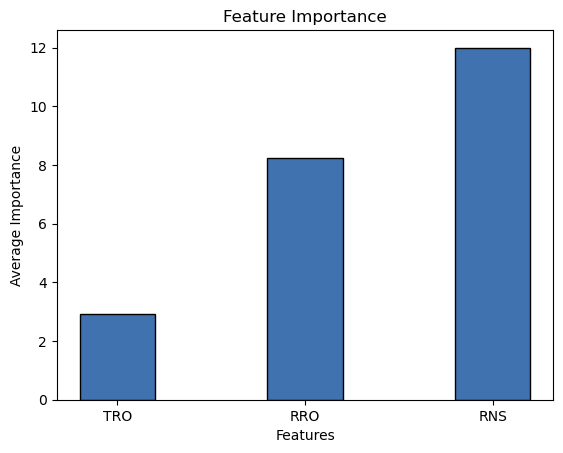

'\nWe can conclude:\n\n[0] The importances order is:\n    RNS > RRO > TRO\n    This means RNS is more important in predicting dyslexia, while TRO is less important.\n'

In [26]:
"""
Model Visualisation - Feature Importances

This code block is used to get feature importances and visualisation.
"""

####### calculate the average importances #######
support_vectors = clf_dyslexia.support_vectors_
feature_array = np.array(support_vectors)
avg_importance = np.mean(feature_array, axis=0)

####### draw a bar plot #######
plt.figure()
plt.bar(predictors, avg_importance, # set data
        color="#3F72AF", edgecolor="black", width=0.4) # set aesthetic
plt.xlabel("Features")
plt.ylabel("Average Importance")
plt.title("Feature Importance")
plt.show()

"""
We can conclude:

[0] The importances order is:
    RNS > RRO > TRO
    This means RNS is more important in predicting dyslexia, while TRO is less important.
"""

'\nWe can conclude:\n\n[0] This martix shows the information:\n    True negatives are 10, True positives are 8.\n    False positives is 1, False negatives is 3\n\n[1] The test set score calculate: \n    TN + TP / TN + TP + FP + FN = \n    10 + 8 / 10 + 8 + 3 + 1 = 0.8182\n'

<Figure size 640x480 with 0 Axes>

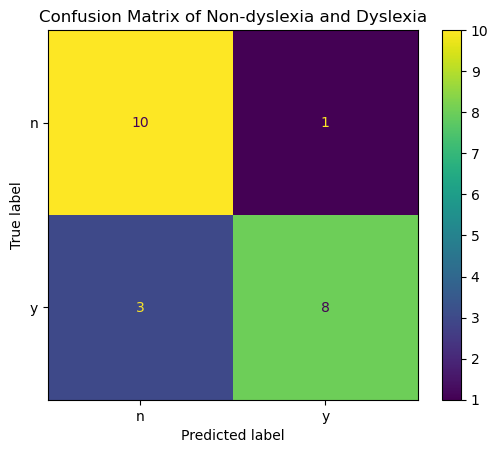

In [27]:
"""
Model Visualisation - Confusion Matrix

This code block is used to draw the confusion matrix.
"""

plt.figure()
ConfusionMatrixDisplay.from_estimator(clf_dyslexia, X_test, y_test) # set the label
plt.title("Confusion Matrix of Non-dyslexia and Dyslexia")

"""
We can conclude:

[0] This martix shows the information:
    True negatives are 10, True positives are 8.
    False positives is 1, False negatives is 3

[1] The test set score calculate: 
    TN + TP / TN + TP + FP + FN = 
    10 + 8 / 10 + 8 + 3 + 1 = 0.8182
"""

<h4>Well done! Submit this file on Blackboard.</h4>